#**Importe de Librerias**

In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt



---



#**Parámetros**

In [2]:
# @title
planet = np.array(['Venus ($CO2-N2$)',
                   'Earth ($N2-O2$)',
                   'Titan ($N2-Ar$)'])

R = np.array([0.19, 0.29, 0.29])

g = np.array([8.89, 9.80, 1.35])

gamma = np.array([10.50, 9.80, 1.30])

T0 = np.array([731, 288, 94])

P0 = np.array([92, 1.013, 1.5])



---



#**Pressure Profile in the Solar System**

El sistema solar alberga una amplia variedad de atmósferas en sus diversos planetas y satelites. Con la intención de abordar algunos de ellos, presentamos una breve descripción sobre sus atmosferas

- **Venus:**
  La atmósfera de Venus está compuesta mayoritariamente por dióxido de carbono (96.5%) y nitrógeno (3.5%), con trazas de dióxido de azufre y vapor de agua. Con una presión superficial 92 veces la de la Tierra, esta atmósfera es extremadamente densa, generando un fuerte efecto invernadero que eleva la temperatura en la superficie a niveles suficientes para derretir plomo.
  
  La presión en Venus aumenta de manera exponencial con la altitud, alcanzando valores extremadamente altos en su superficie debido a su densidad atmosférica notablemente elevada. Este fenómeno se asocia con la composición predominante de dióxido de carbono y la intensa fuerza gravitatoria en Venus.

- **Tierra:**
  La atmósfera terrestre, compuesta principalmente por nitrógeno (78%) y oxígeno (21%), junto con trazas de otros gases como argón y dióxido de carbono, exhibe una presión atmosférica de aproximadamente 1 atmósfera al nivel del mar. Esta atmósfera se divide en varias capas y cada una cuenta con características únicas que influyen en el clima y las condiciones meteorológicas.

  La atmósfera de Tierra muestra un perfil de presión más gradual a medida que aumenta la altitud. La presión disminuye a un ritmo constante en la troposfera, la capa más baja de la atmósfera, donde se encuentra la mayor parte de la masa atmosférica. La estratosfera, por otro lado, muestra una variación más lenta en la presión con respecto a la altitud.

- **Titán (luna de Saturno):**
  Esta luna de Saturno, presenta una atmósfera compuesta principalmente por nitrógeno y una significativa proporción de metano (alrededor del 5%). Aunque su presión superficial es mayor que la terrestre, la baja gravedad de Titán resulta en una densidad atmosférica menor. Este entorno único da lugar a fenómenos meteorológicos extraordinarios, como lluvias de metano y etano, y la presencia de lagos y mares de hidrocarburos líquidos en su superficie.

  Aunque comparte algunas similitudes con la Tierra, como una disminución gradual de la presión con la altitud, la composición de su atmósfera, predominantemente compuesta de nitrógeno y metano, y su menor gravedad dan lugar a diferencias notables. Además, la presión atmosférica en la superficie de Titán es más de una vez y media la de la Tierra, a pesar de su menor gravedad.

Las siguientes expresiones desarrolladas por Sánchez-Lavega, Pérez-Hoyos y Hueso [1] describen el perfil de presión para una atmosfera planetaria en función de la altura, $z$, y parámetros adicionales como la presión superficial $P_0$, la temperatura superficial $T_0$, la gravedad del planeta $g$, el gradiente adiabático $\Gamma_a$ y la constante de gases especifica $R^*$.

Dependiendo de la forma cómo se modele la atmosfera, su ecuación de perfil de presión cambia.

- Para una atmosfera isotérmica:

  $$P(z)=P_0e^{-\frac{gz}{R^*T_0}}$$

- Para una atmosfera adiabática:

  $$P(z)=P_0\left(1-\frac{\Gamma_a(z-z_0}{T_0}\right)^{\frac{g}{R^*\Gamma_a}}$$

A continuación presentamos la modelación de los perfiles de presión para las atomosferas de Venus, Tierra y Titán de acuerdo con el modelo anterior.

- **1.** Agustı́n Sánchez-Lavega, Santiago Pérez-Hoyos, Ricardo Hueso; Clouds in planetary atmospheres: A useful application of the Clausius–Clapeyron equation. Am. J. Phys. 1 June 2004; 72 (6): 767–774. https://doi.org/10.1119/1.1645279

In [3]:
# @title
def P_isoterm(z):
  return P0*np.exp(-g*z/(R*T0))

def P_adiabatic(z):
  return P0*((1-(gamma*z/T0))**(g/(R*gamma)))

In [4]:
# @title
zs = np.linspace(0, 100, 100)

P_iso = np.zeros((3,100))
P_ad = np.zeros((3,100))

for i, z in enumerate(zs):
  P_iso[:,i] = P_isoterm(z)
  P_ad[:,i] = P_adiabatic(z)

<ipython-input-3-795e04b0b112>:6: RuntimeWarning: invalid value encountered in power
  return P0*((1-(gamma*z/T0))**(g/(R*gamma)))


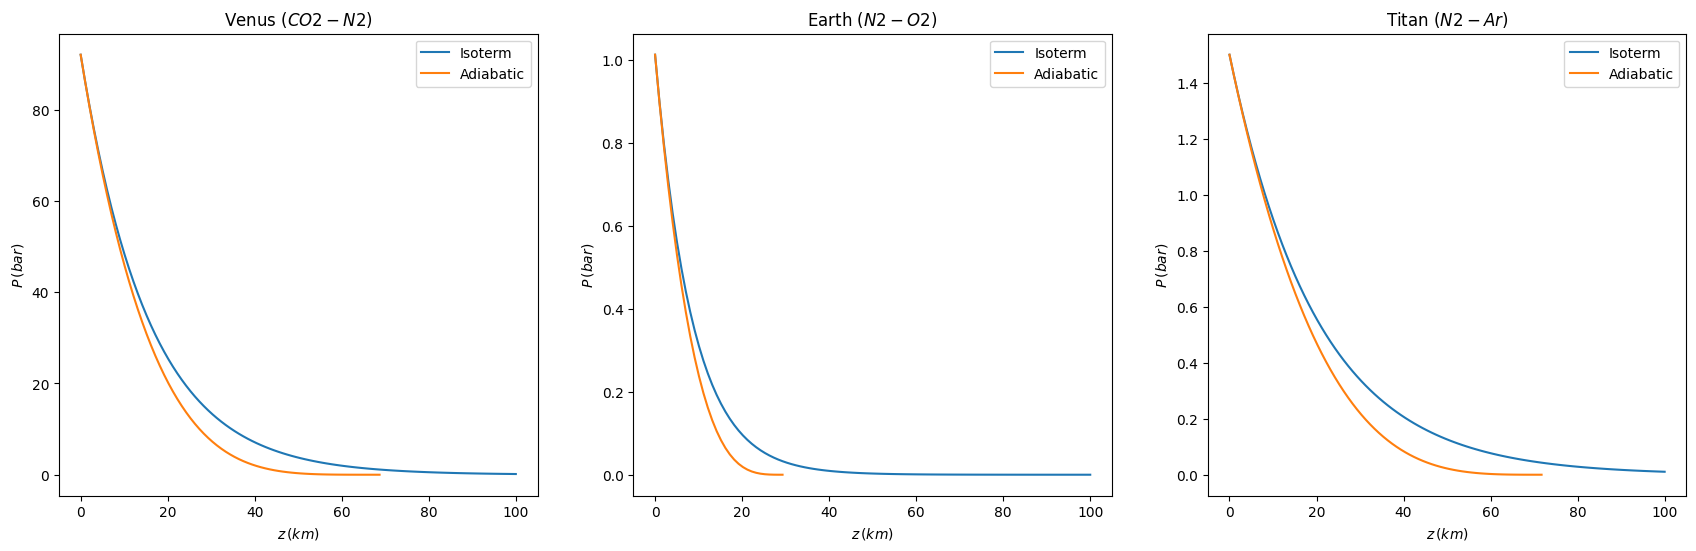

In [5]:
# @title
fig = plt.figure(figsize = (21,6))
for i in range(3):
  fig.add_subplot(1,3,i+1)
  plt.plot(zs, P_iso[i], label = 'Isoterm')
  plt.plot(zs, P_ad[i], label = 'Adiabatic')
  plt.title(f'{planet[i]}')
  plt.xlabel('$z\,(km)$')
  plt.ylabel('$P\,(bar)$')
  plt.legend()



---



#**Discusión**

En la realidad, estos cuerpos del Sistema Solar no exhiben un comportamiento precisamente isotérmico o adiabático en sus atmosferas; sin embargo, como parte del modelo se presentan los escenarios que consideran estas condiciones

**Isotérmico:**
En un escenario isotérmico, donde la temperatura se mantiene constante con la altitud, la variación de la presión con respecto a la altitud estaría determinada principalmente por la ley de los gases ideales. En este caso, la presión disminuiría exponencialmente con la altitud, pero a una tasa menor que la observada en un modelo adiabático. En Venus, la constancia de la temperatura podría mitigar en parte la rapidez con la que la presión aumentaría con la altitud debido a la alta densidad atmosférica. En la Tierra, este modelo no reflejaría la variación real de la temperatura con la altitud, lo que es fundamental para comprender fenómenos meteorológicos como la formación de nubes y la circulación atmosférica. En Titán, la atmósfera isotérmica influiría en la distribución de los componentes atmosféricos, pero la variabilidad estacional y la presencia de líquidos en la superficie también desempeñarían un papel significativo.

**Adiabático:**
En un escenario adiabático, donde no hay intercambio de calor con el entorno, la variación de la temperatura con respecto a la altitud sigue un gradiente adiabático seco o húmedo. Este modelo reflejaría con mayor precisión la dinámica real de las atmósferas planetarias:

- **Presión en Venus:** La presión aumentaría rápidamente con la altitud en las capas inferiores debido a la compresión adiabática, contribuyendo a las extremas condiciones en la superficie venusiana. La presión seguiría disminuyendo con una tasa menos pronunciada a altitudes más elevadas.

- **Presión en la Tierra:** La variación adiabática de la presión con la altitud en la troposfera y la estratosfera sería crucial para la formación de nubes y la dinámica climática. La humedad atmosférica también influiría en el gradiente adiabático.

- **Presión en Titán:** Los procesos adiabáticos en Titán afectarían la circulación atmosférica y la distribución de nitrógeno y metano. La variabilidad estacional y la presencia de líquidos en la superficie añadirían complejidad al comportamiento atmosférico.